# Contact Maps
This Notebook shows how to visualize a matrix with contact info for both understanding the data or a publication.

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from IPython.display import set_matplotlib_formats

In [2]:
# Setting plot figure size, font etc.
%matplotlib inline

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 20, 20
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
# If you have LaTex installed, uncomment the next lines
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = "sans-serif"
#plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm}"

## Plotting all residues in contanct

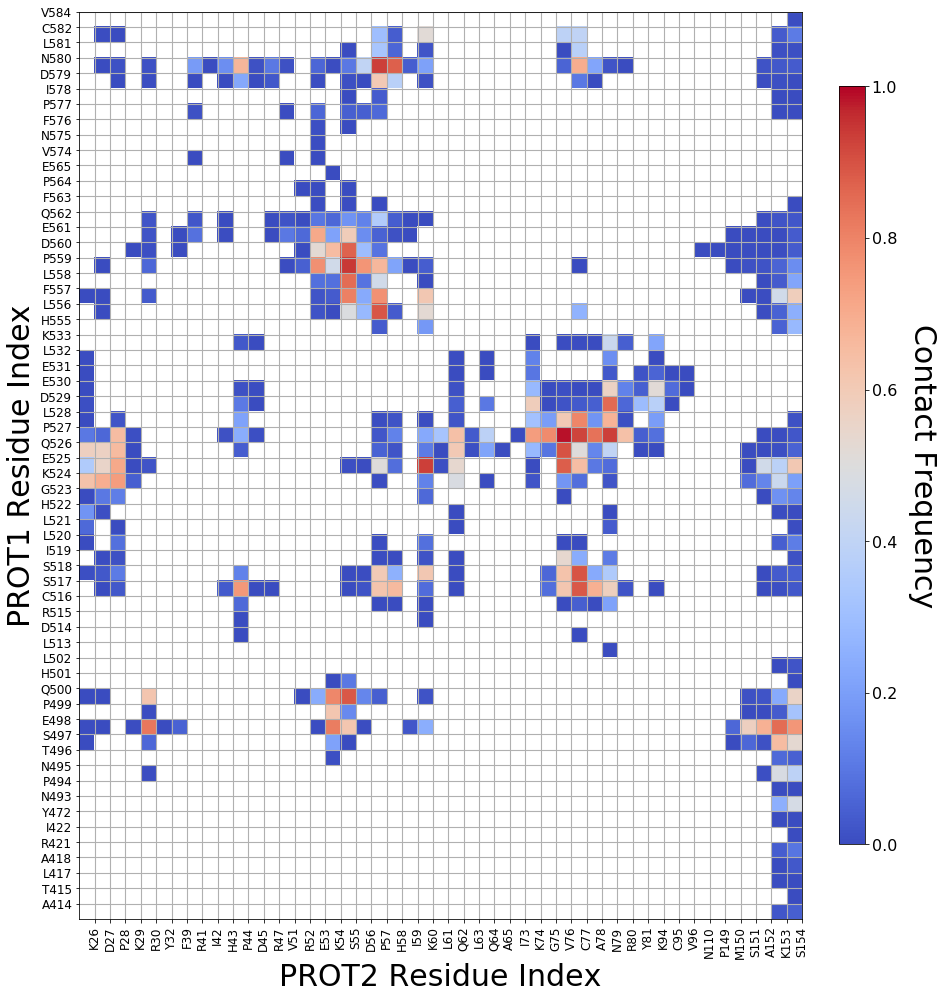

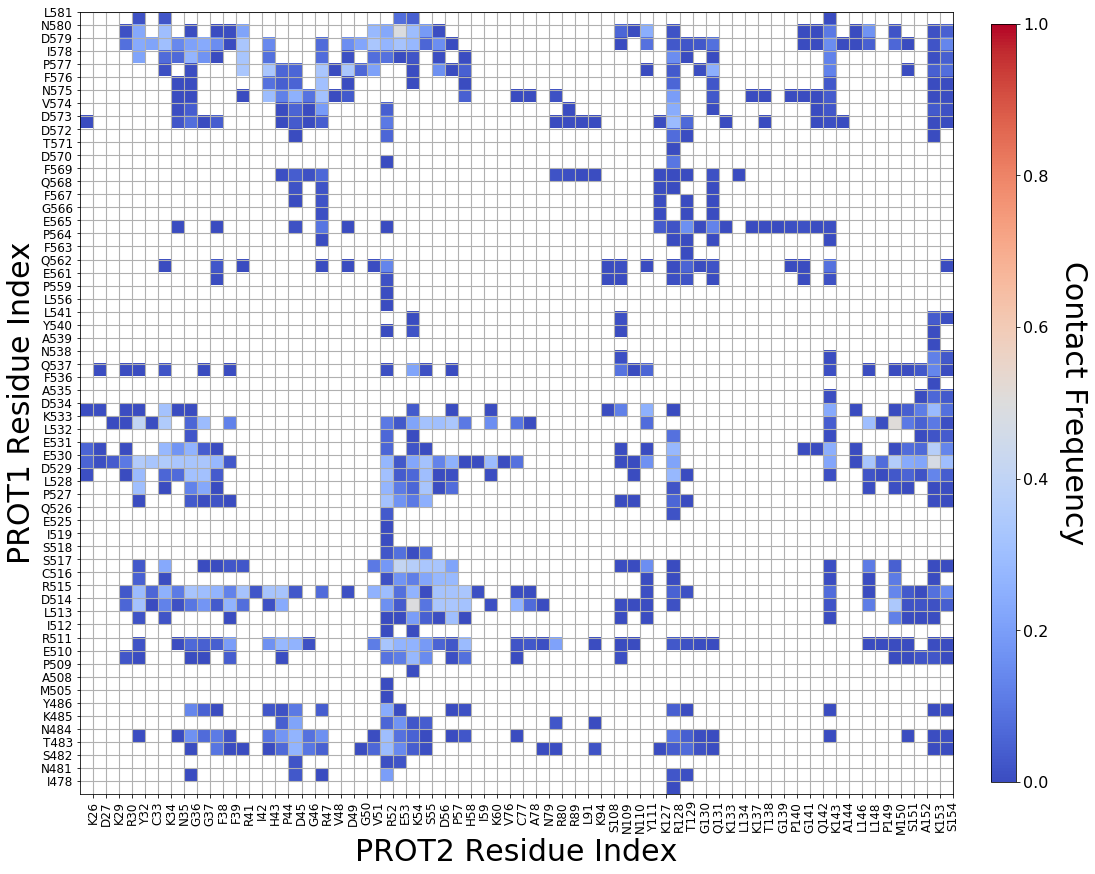

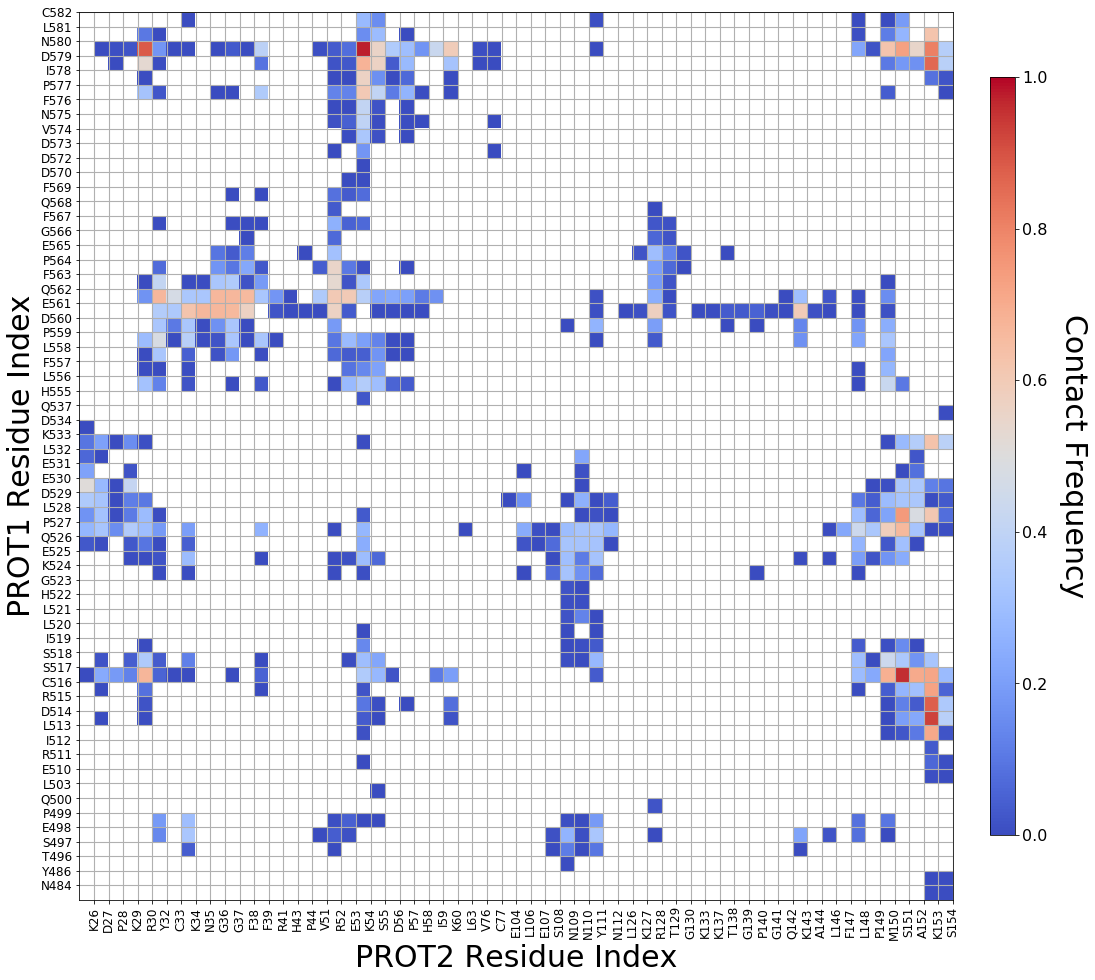

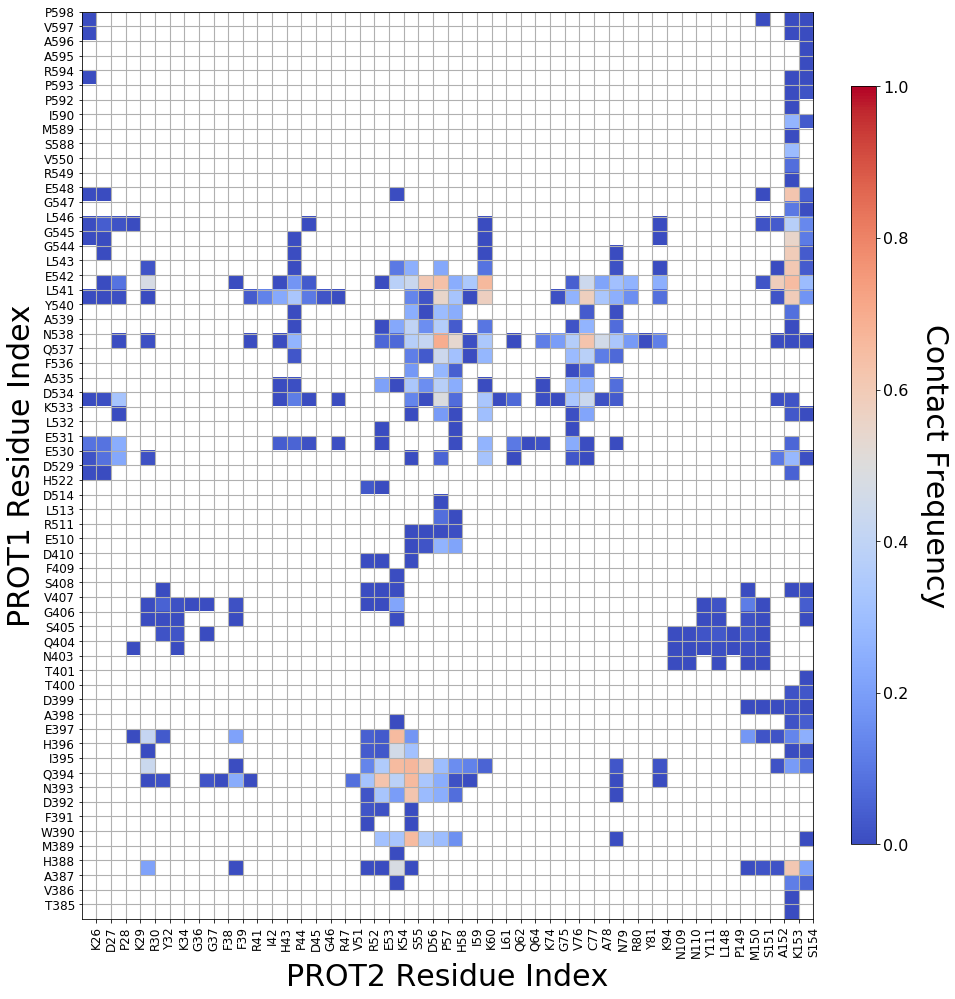

In [3]:
# How many contact maps to plot?
plots = 4

for i in range(1,plots+1):

    # Load contact map
    data    = np.loadtxt("data/contact_maps/contact_map_system_"+str(i)+".dat")
    
    # Load protein sequences
    PROT1    = np.genfromtxt("data/protein_sequences/PROT_1.sequence", dtype=np.str)
    PROT2    = np.genfromtxt("data/protein_sequences/PROT_2.sequence", dtype=np.str)


    # Remove Residues of protein 1 that are not in contacts with protein 2    
    lines_to_remove = []
    for k in range(data.shape[0]):
        if np.sum(data[k]) == 0:
            lines_to_remove.append(k)

    data_no_lines = np.delete(data, lines_to_remove, axis=0)
                             
    # Remove the not interactive residues from the imported protein sequence   
    PROT1_short    = np.delete(PROT1, lines_to_remove, axis=0)


    # Remove Residues of protein 2 that are not in contacts with protein 1    
    cols_to_remove = []
    for j in range(data_no_lines.shape[1]):
        if np.sum(data_no_lines[:,j]) == 0:
            cols_to_remove.append(j)

    data_new      = np.delete(data_no_lines, cols_to_remove, axis=1)
                             
    # Remove the not interactive residues from the imported protein sequence   
    PROT2_short    = np.delete(PROT2, cols_to_remove, axis=0)

    
    # Convert 0 in nan to exclude the visualization of 0 contacts from the contact map.
    data_new[data_new ==0]=np.nan


    # Plotting
    fig, ax = plt.subplots()

    plt.imshow(data_new, origin="low", cmap="coolwarm")

    # To make room for labels
    fig.subplots_adjust(bottom=0.25,left=0.25) 

    # Setting Label name
    plt.xlabel("PROT2 Residue Index")
    plt.ylabel("PROT1 Residue Index")

    # Set ticks number and position
    ax.set_xticks(np.arange(data_new.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data_new.shape[0]) + 0.5, minor=False)


    # Rotate the xlabels. Set both x and y labels to headers[1:]
    ax.set_yticklabels(PROT1_short, fontsize=12)
    ax.set_xticklabels(PROT2_short,rotation=90, fontsize=12)
    

    # Color bar settings
    plt.clim(0,1)
    plt.colorbar(fraction=0.027, pad=0.04, aspect=30).set_label("Contact Frequency", size=30, rotation=270, labelpad=40)
    
    plt.grid(True, linewidth=1.1)
    plt.margins(x=0.01, y=0.01)
                             
    # Save plots 
    plt.savefig("Results/contact_map_system_"+str(i)+".pdf", dpi=500)

    # Show plots 
    plt.show()

## Plotting all residues in contact with a frequency of contact > 50%

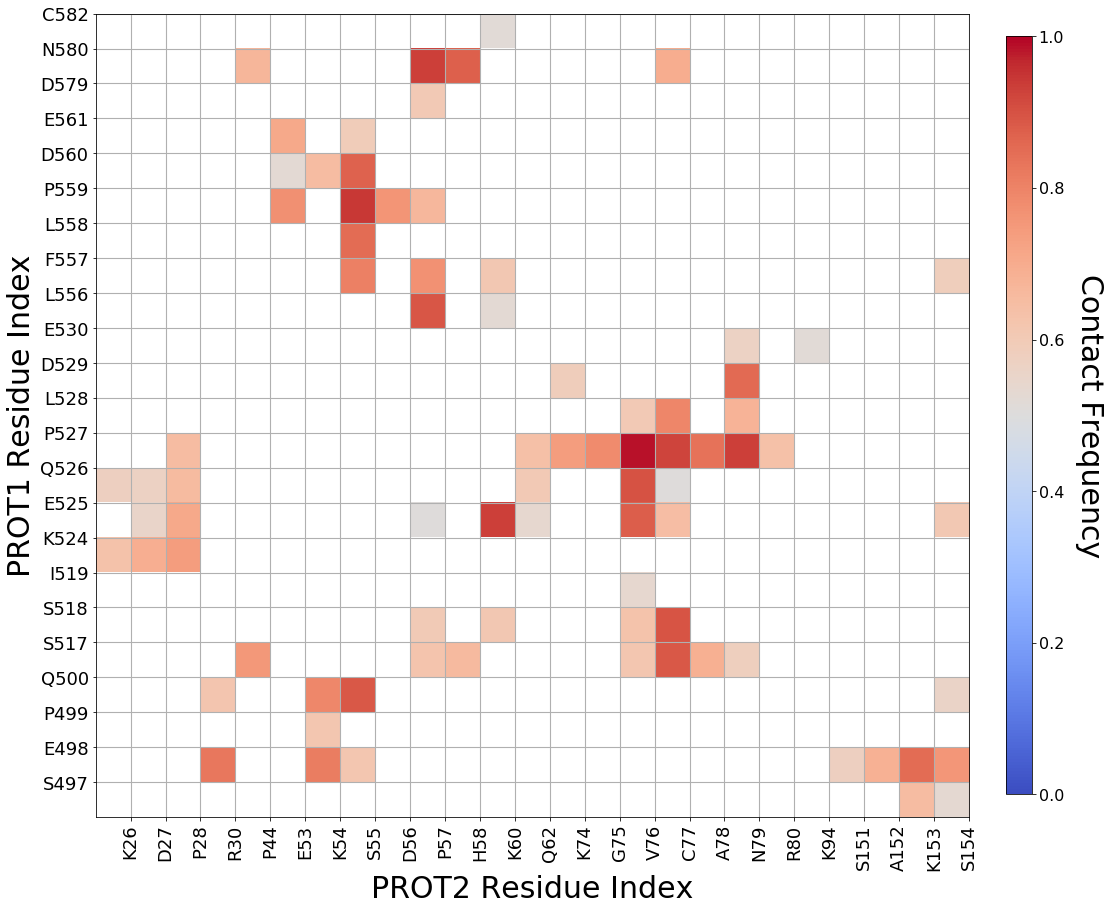

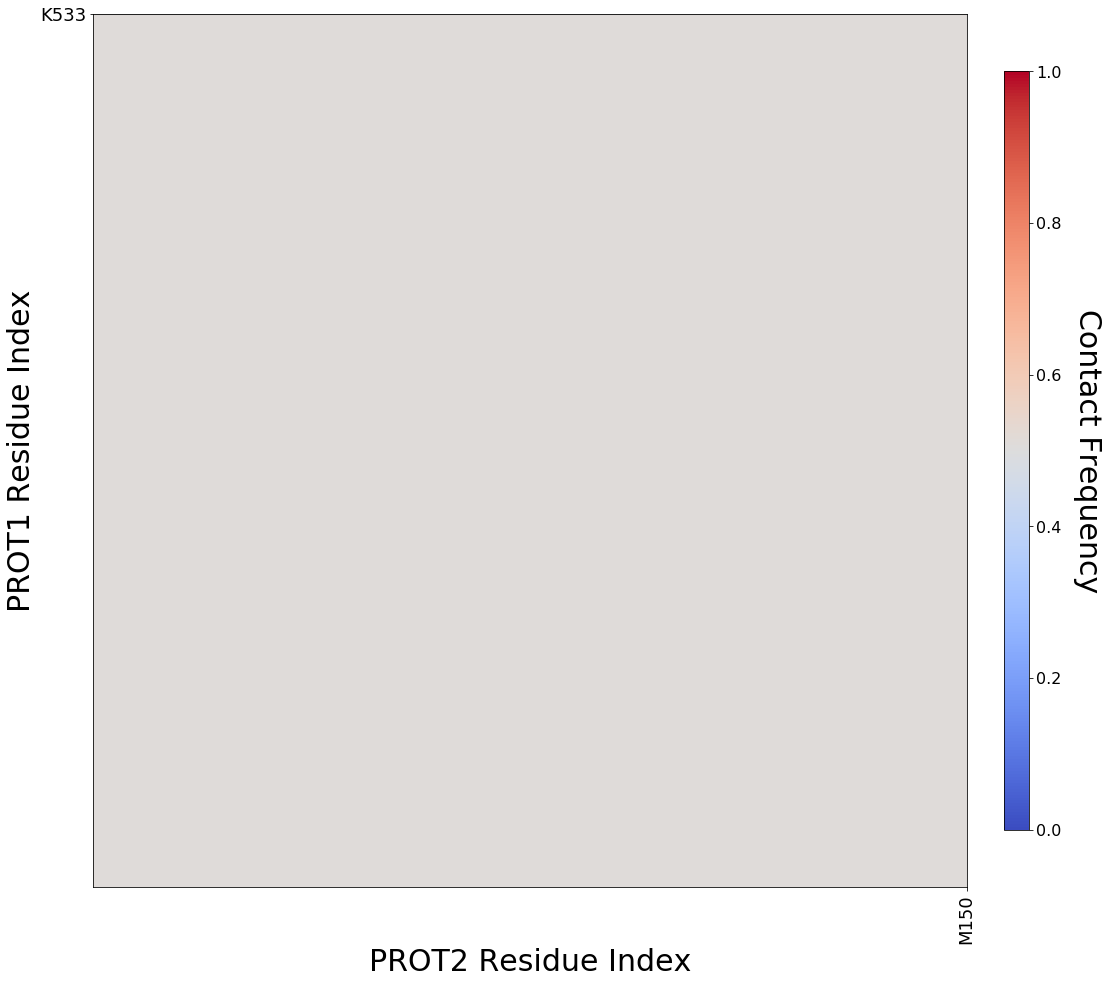

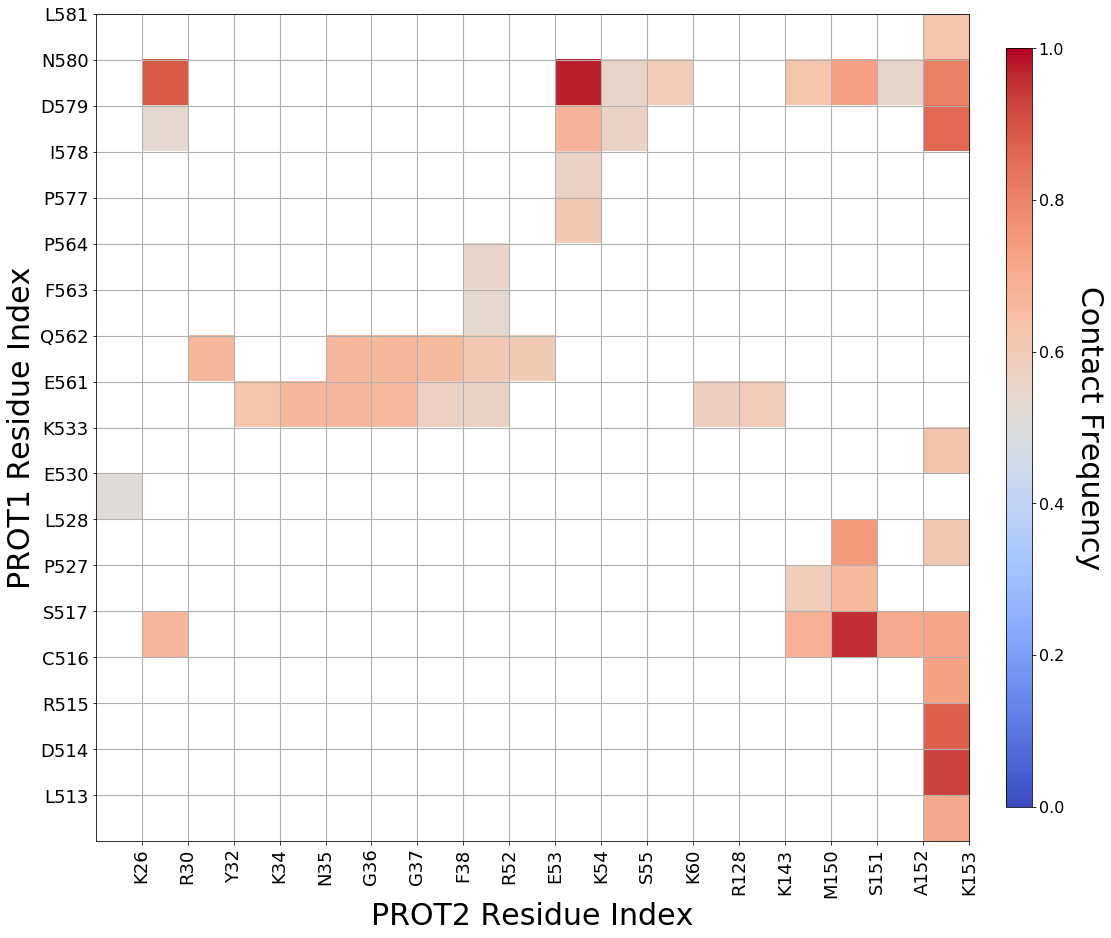

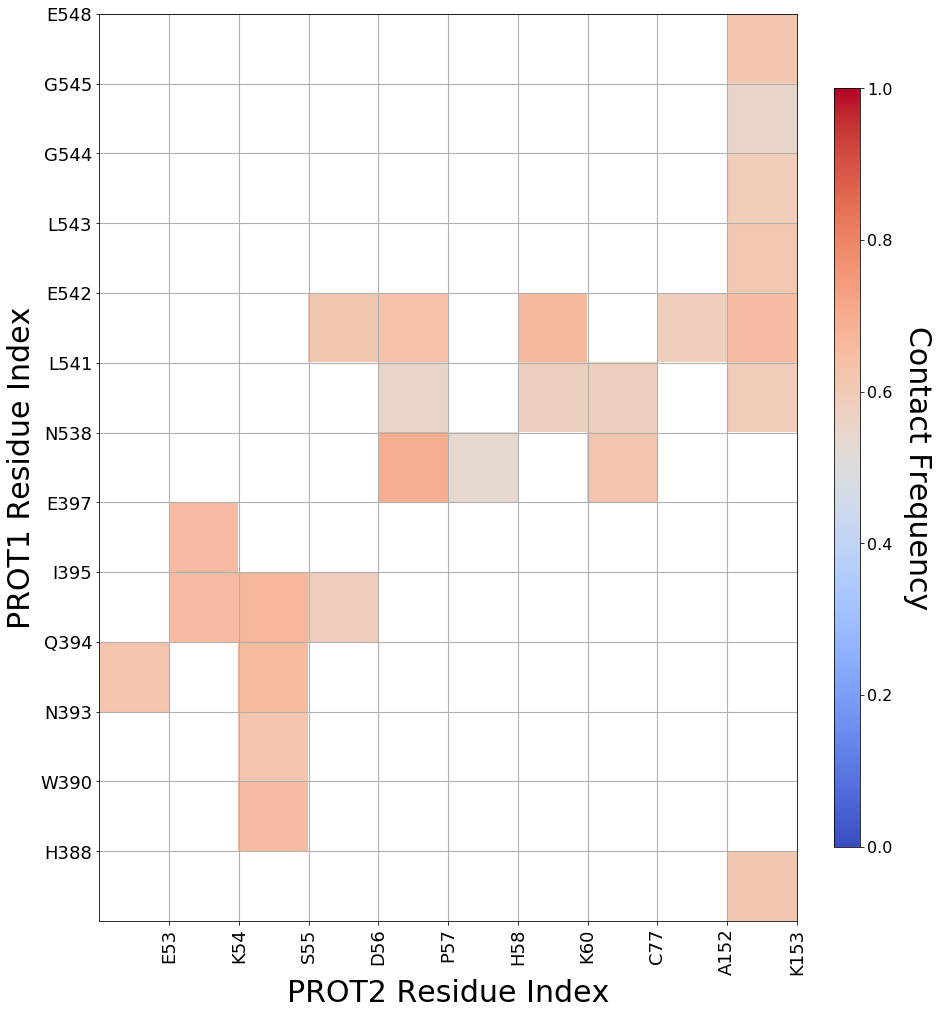

In [4]:
# How many contact maps to plot?
plots = 4

for i in range(1,plots+1):

    # Load contact map
    data    = np.loadtxt("data/contact_maps/contact_map_system_"+str(i)+".dat")
    
    # Convert to 0 all the contacts with a frequency < 50%
    data[data <0.5]=0


    
    # Load protein sequences
    PROT1    = np.genfromtxt("data/protein_sequences/PROT_1.sequence", dtype=np.str)
    PROT2    = np.genfromtxt("data/protein_sequences/PROT_2.sequence", dtype=np.str)


    # Remove Residues of protein 1 that are not in contacts with protein 2    
    lines_to_remove = []
    for k in range(data.shape[0]):
        if np.sum(data[k]) == 0:
            lines_to_remove.append(k)

    data_no_lines = np.delete(data, lines_to_remove, axis=0)
                             
    # Remove the not interactive residues from the imported protein sequence   
    PROT1_short    = np.delete(PROT1, lines_to_remove, axis=0)


    # Remove Residues of protein 2 that are not in contacts with protein 1    
    cols_to_remove = []
    for j in range(data_no_lines.shape[1]):
        if np.sum(data_no_lines[:,j]) == 0:
            cols_to_remove.append(j)

    data_new      = np.delete(data_no_lines, cols_to_remove, axis=1)
                             
    # Remove the not interactive residues from the imported protein sequence   
    PROT2_short    = np.delete(PROT2, cols_to_remove, axis=0)

    
    # Convert 0 in nan to exclude the visualization of 0 contacts from the contact map.
    data_new[data_new ==0]=np.nan


    # Plotting
    fig, ax = plt.subplots()

    plt.imshow(data_new, origin="low", cmap="coolwarm")

    # To make room for labels
    fig.subplots_adjust(bottom=0.25,left=0.25) 

    # Setting Label name
    plt.xlabel("PROT2 Residue Index")
    plt.ylabel("PROT1 Residue Index")

    # Set ticks number and position
    ax.set_xticks(np.arange(data_new.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data_new.shape[0]) + 0.5, minor=False)


    # Rotate the xlabels. Set both x and y labels to headers[1:]
    ax.set_yticklabels(PROT1_short, fontsize=18)
    ax.set_xticklabels(PROT2_short,rotation=90, fontsize=18)
    

    # Color bar settings
    plt.clim(0,1)
    plt.colorbar(fraction=0.027, pad=0.04, aspect=30).set_label("Contact Frequency", size=30, rotation=270, labelpad=40)
    
    plt.grid(True, linewidth=1.1)
    plt.margins(x=0.01, y=0.01)
                             
    # Save plots 
    plt.savefig("Results/contact_map_0.5_system_"+str(i)+".pdf", dpi=500)

    # Show plots 
    plt.show()

### Hands on
Based on the two scripts above, filter and print only those contacts that have a frequency in excess of 0.8? Copy the script from above to a new cell and work from there. Select just one of the data files.